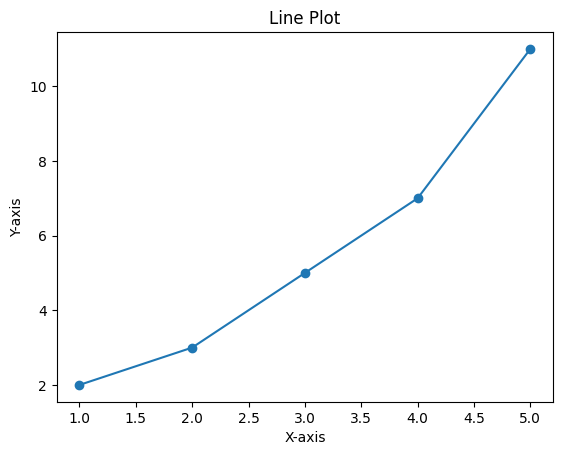

In [2]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
plt.plot(x, y, marker='o')
plt.title("Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


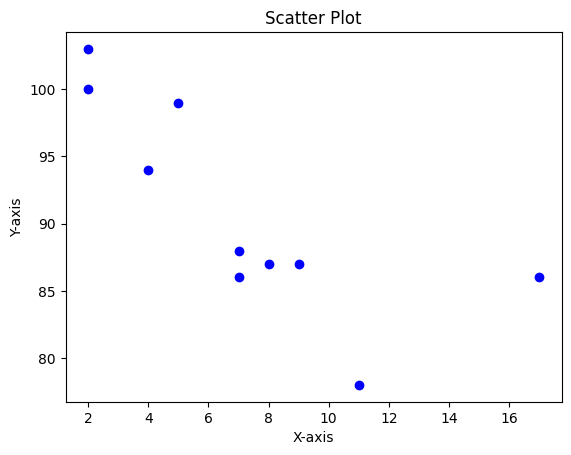

In [3]:
import matplotlib.pyplot as plt

x = [5, 7, 8, 7, 2, 17, 2, 9, 4, 11]
y = [99, 86, 87, 88, 100, 86, 103, 87, 94, 78]
plt.scatter(x, y, color='blue')
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


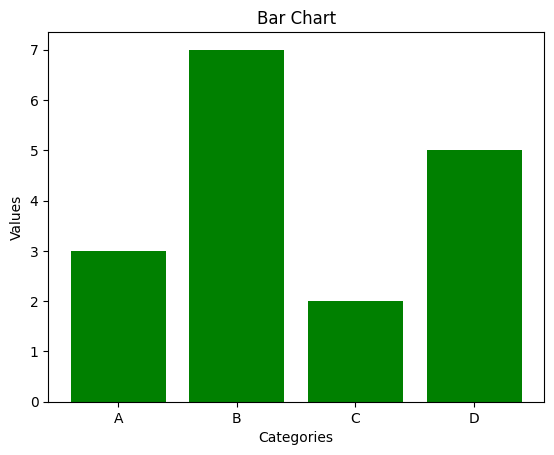

In [4]:
import matplotlib.pyplot as plt

categories = ["A", "B", "C", "D"]
values = [3, 7, 2, 5]
plt.bar(categories, values, color='green')
plt.title("Bar Chart")
plt.xlabel("Categories")
plt.ylabel("Values")
plt.show()


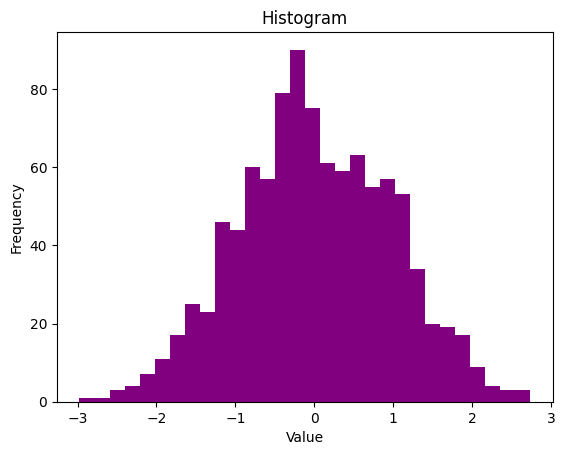

In [5]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randn(1000)
plt.hist(data, bins=30, color='purple')
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


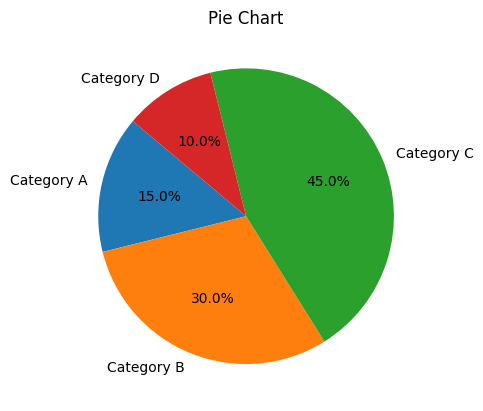

In [6]:
import matplotlib.pyplot as plt

sizes = [15, 30, 45, 10]
labels = ["Category A", "Category B", "Category C", "Category D"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart")
plt.show()


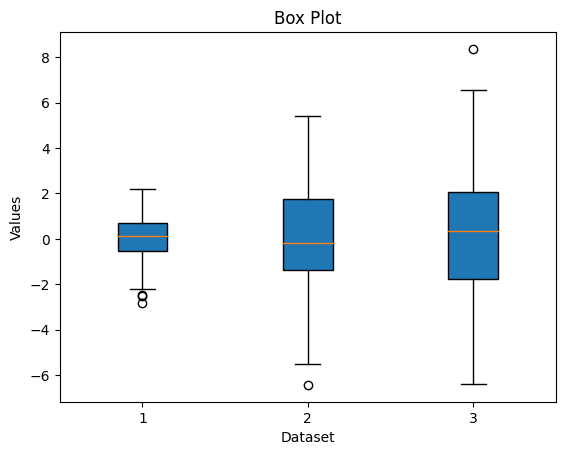

In [7]:
import matplotlib.pyplot as plt
import numpy as np

data = [np.random.normal(0, std, 100) for std in range(1, 4)]
plt.boxplot(data, vert=True, patch_artist=True)
plt.title("Box Plot")
plt.xlabel("Dataset")
plt.ylabel("Values")
plt.show()


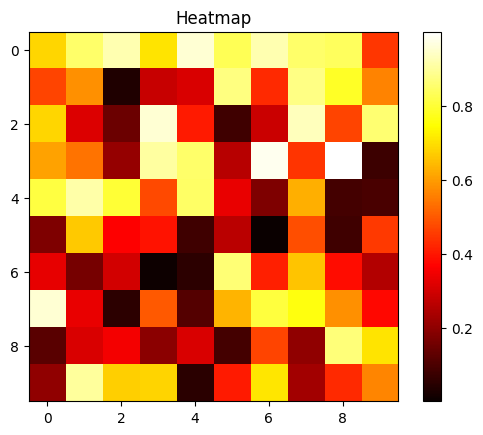

In [8]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.rand(10, 10)
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Heatmap")
plt.show()


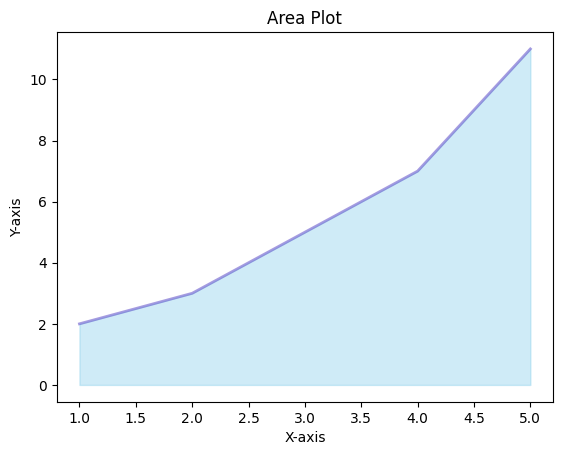

In [9]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
plt.fill_between(x, y, color="skyblue", alpha=0.4)
plt.plot(x, y, color="Slateblue", alpha=0.6, linewidth=2)
plt.title("Area Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


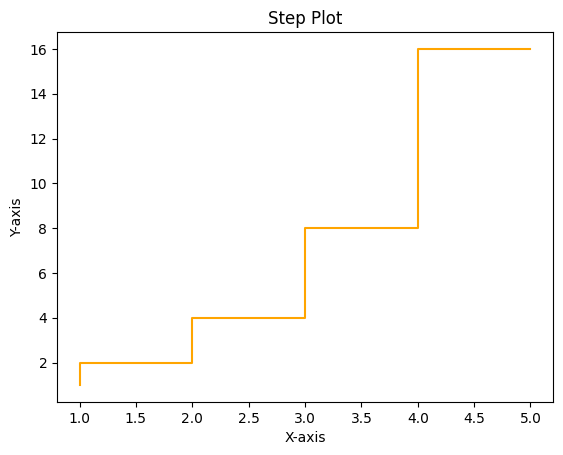

In [10]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 2, 4, 8, 16]
plt.step(x, y, color='orange')
plt.title("Step Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


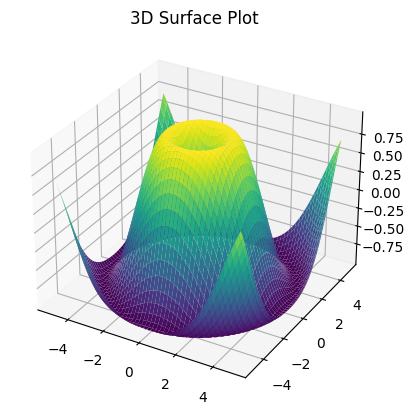

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title("3D Surface Plot")
plt.show()


              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
Mean Squared Error: 9766.774281962149
R2 Score: 0.4498184686803247


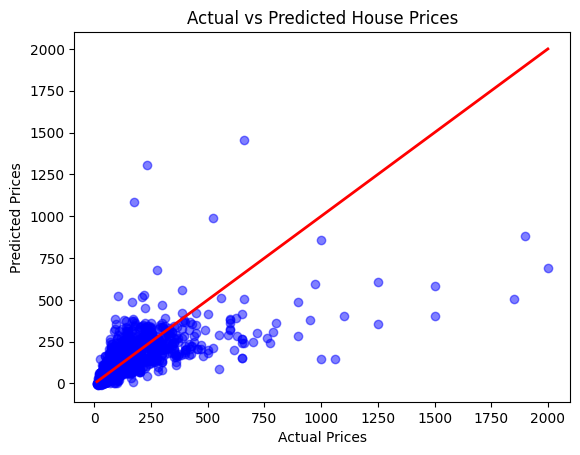

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r'''D:\Programming\vsjupiter\AIML training\Bengaluru_House_Data.csv''')
# Display the first few rows
print(data.head())

# Preprocess the data
# Drop unnecessary columns
data = data.drop(columns=['area_type', 'society', 'availability', 'balcony'])

# Drop rows with missing values
data = data.dropna()

# Feature Engineering: Convert the 'size' column (e.g., '3 BHK') to numerical values
data['size'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

# Convert 'total_sqft' to a numerical value (handle ranges by averaging)
def convert_sqft_to_num(x):
    try:
        return float(x)
    except:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return None

data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)
data = data.dropna(subset=['total_sqft'])  # Drop rows where conversion failed

# Select features and target variable
X = data[['total_sqft', 'bath', 'size']]
y = data['price']  # Target variable (price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler to normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Plot actual vs predicted prices for a quick visualization
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Sample email spans and labels
data = {
    "email_span": [
        "Please submit your report by Monday.",
        "Best regards, John.",
        "Click here to win a free iPhone.",
        "Thank you for your time."
    ],
    "label": [1, 0, 1, 0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['email_span'], df['label'], test_size=0.2, random_state=42)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vect, y_train)

# Make predictions
y_pred = model.predict(X_test_vect)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 